## Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

## Loading the dataset

In [ ]:
df = pd.read_csv("dataset.csv")
df

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,1449601597,1.000371,0.007671,-0.016173,0.027860,0.998221,1.000739,1.003265,0.891038,6.684582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,1449601657,1.000243,0.003782,-0.002713,0.007046,0.998463,1.000373,1.002088,1.647929,6.684605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,1449601717,1.000811,0.002082,-0.001922,0.003575,0.999653,1.000928,1.002032,1.960286,6.684610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,1449601777,1.001245,0.004715,-0.002895,0.008881,0.999188,1.001425,1.003500,1.614524,6.684601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,1449601855,1.001354,0.065186,-0.096520,0.165298,1.000807,1.002259,1.003631,0.837790,6.682252,...,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,1449859467,1.002591,0.001446,0.000142,0.001900,1.001562,1.002603,1.003569,2.401218,6.684611,...,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,1.0,2
3956,1449859527,1.002673,0.001349,-0.000593,0.001731,1.001677,1.002749,1.003635,2.593006,6.684611,...,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,1.0,2
3957,1449859587,1.002523,0.028048,0.027043,0.076903,1.001037,1.002792,1.004425,0.509456,6.684221,...,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,1.0,2
3958,1449859647,1.002590,0.005246,-0.001691,0.008700,1.000274,1.002775,1.005013,1.941774,6.684598,...,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,1.0,2


## Data Preprocessing

In [ ]:
df.isna().sum()

timestamp                             0
raw_acc:magnitude_stats:mean          0
raw_acc:magnitude_stats:std           0
raw_acc:magnitude_stats:moment3       0
raw_acc:magnitude_stats:moment4       0
                                   ... 
label:PHONE_IN_BAG                 3960
label:PHONE_ON_TABLE               3107
label:WITH_CO-WORKERS              3960
label:WITH_FRIENDS                   81
label_source                          0
Length: 278, dtype: int64

In [ ]:
# List of columns to drop
columns_to_drop = ['label:PHONE_IN_BAG', 'label:PHONE_ON_TABLE', 'label:WITH_CO-WORKERS', 'label:WITH_FRIENDS', 'label:ELEVATOR', 'label:PHONE_IN_HAND']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.isna().sum()

timestamp                           0
raw_acc:magnitude_stats:mean        0
raw_acc:magnitude_stats:std         0
raw_acc:magnitude_stats:moment3     0
raw_acc:magnitude_stats:moment4     0
                                   ..
label:STAIRS_-_GOING_UP            81
label:STAIRS_-_GOING_DOWN          81
label:OR_standing                  81
label:AT_SCHOOL                    81
label_source                        0
Length: 272, dtype: int64

In [ ]:
# List of columns to drop
columns_to_drop = ['label:GROOMING', 'label:AT_THE_GYM', 'label:COMPUTER_WORK', 'label:AT_A_BAR', 'label:LOC_beach', 'label:SINGING', 'label:WATCHING_TV', 'label:SURFING_THE_INTERNET', 'label:AT_A_PARTY']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.isna().sum()

timestamp                           0
raw_acc:magnitude_stats:mean        0
raw_acc:magnitude_stats:std         0
raw_acc:magnitude_stats:moment3     0
raw_acc:magnitude_stats:moment4     0
                                   ..
label:STAIRS_-_GOING_UP            81
label:STAIRS_-_GOING_DOWN          81
label:OR_standing                  81
label:AT_SCHOOL                    81
label_source                        0
Length: 263, dtype: int64

In [ ]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:WASHING_DISHES,label:TALKING,label:EATING,label:TOILET,label:DRESSING,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:OR_standing,label:AT_SCHOOL,label_source
0,0.000000,0.028627,0.011113,0.237954,0.024351,0.662784,0.150224,0.022829,0.301580,0.999779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1,0.000232,0.028376,0.004747,0.251279,0.005382,0.663149,0.149455,0.021117,0.565785,0.999954,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2,0.000465,0.029488,0.001964,0.252062,0.002218,0.664943,0.150621,0.021036,0.674818,0.999992,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3,0.000697,0.030338,0.006274,0.251099,0.007054,0.664242,0.151666,0.023171,0.554124,0.999924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,0.001000,0.030552,0.105261,0.158412,0.149608,0.666682,0.153418,0.023362,0.282993,0.982055,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.428571


In [ ]:
df = df.fillna(df.median())
df

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:WASHING_DISHES,label:TALKING,label:EATING,label:TOILET,label:DRESSING,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:OR_standing,label:AT_SCHOOL,label_source
0,0.000000,0.028627,0.011113,0.237954,0.024351,0.662784,0.150224,0.022829,0.301580,0.999779,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.000232,0.028376,0.004747,0.251279,0.005382,0.663149,0.149455,0.021117,0.565785,0.999954,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000465,0.029488,0.001964,0.252062,0.002218,0.664943,0.150621,0.021036,0.674818,0.999992,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.000697,0.030338,0.006274,0.251099,0.007054,0.664242,0.151666,0.023171,0.554124,0.999924,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.001000,0.030552,0.105261,0.158412,0.149608,0.666682,0.153418,0.023362,0.282993,0.982055,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,0.999070,0.032974,0.000923,0.254105,0.000692,0.667820,0.154141,0.023272,0.828733,1.000000,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.428571
3956,0.999303,0.033135,0.000764,0.253378,0.000538,0.667994,0.154448,0.023368,0.895680,1.000000,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.428571
3957,0.999535,0.032841,0.044469,0.280737,0.069047,0.667029,0.154538,0.024517,0.168382,0.997033,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.428571
3958,0.999768,0.032972,0.007144,0.252291,0.006889,0.665879,0.154502,0.025372,0.668356,0.999901,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.428571


## Vizualization

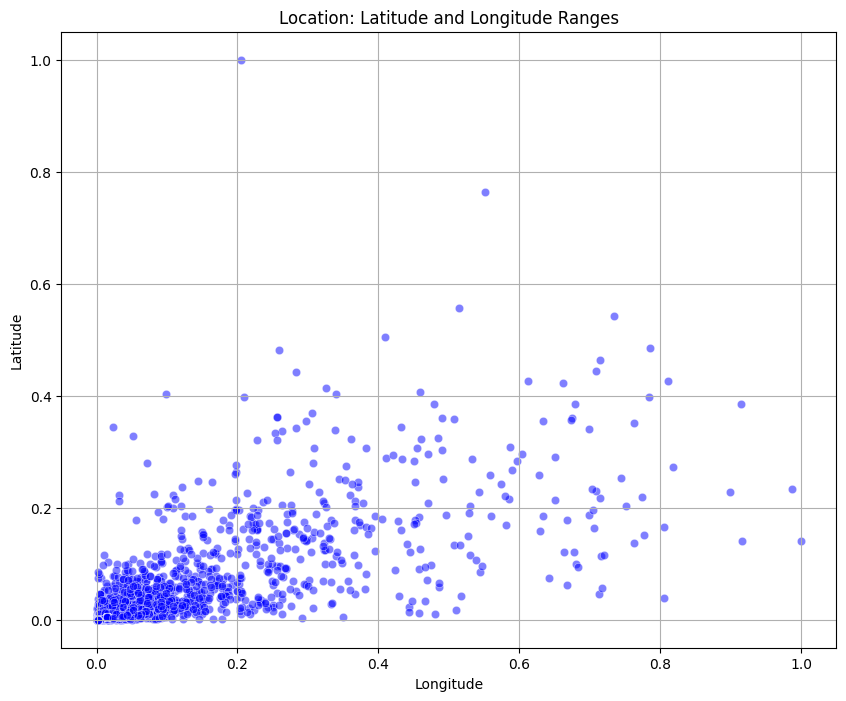

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='location:log_longitude_range', y='location:log_latitude_range', data=df, color='blue', alpha=0.5)
plt.title('Location: Latitude and Longitude Ranges')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

##  (i) K-means clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-50-18164c00d32c>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cluster'] = kmeans.labels_


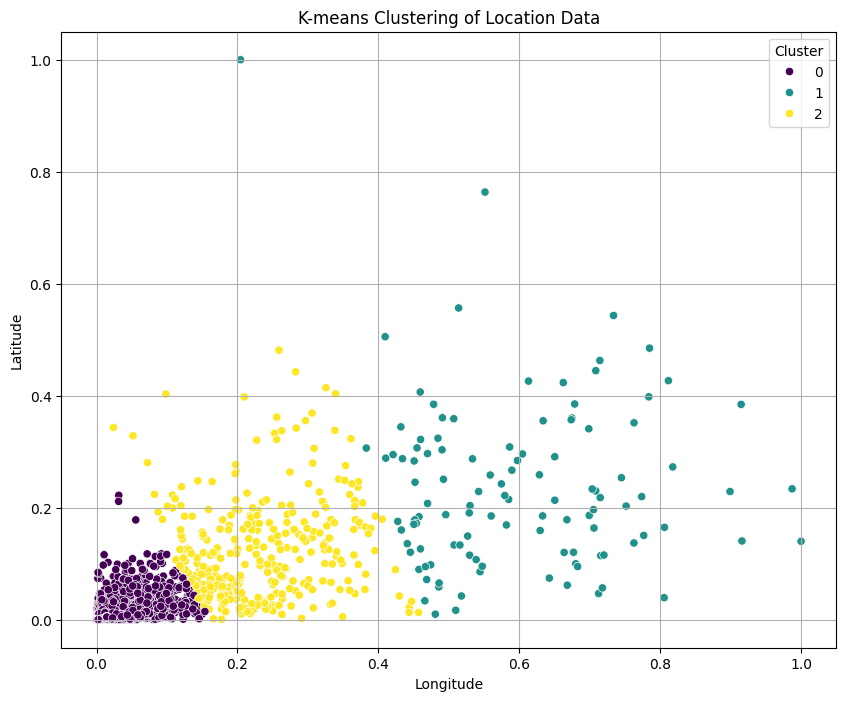

In [ ]:
X = df[['location:log_latitude_range', 'location:log_longitude_range']]

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 8))
sns.scatterplot(x='location:log_longitude_range', y='location:log_latitude_range', hue='cluster', data=df, palette='viridis')
plt.title('K-means Clustering of Location Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

## (ii) pie plot

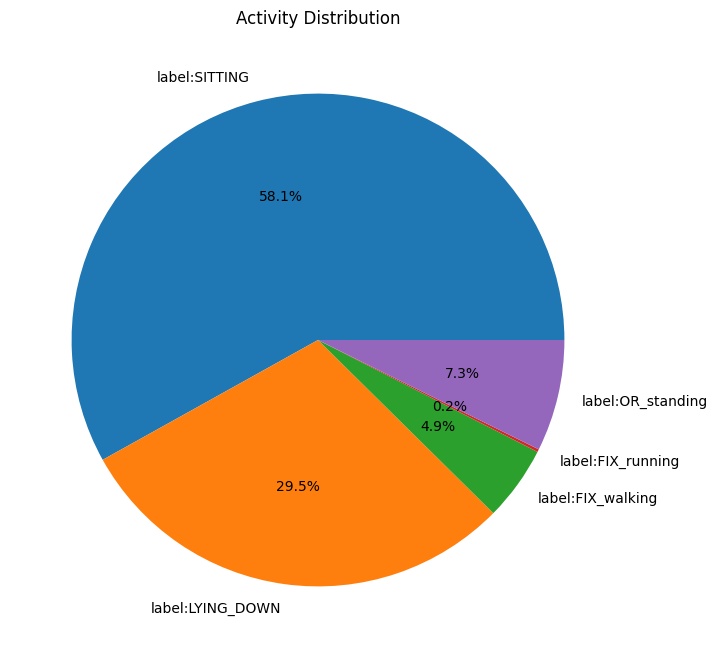

In [ ]:
activities = ['label:SITTING', 'label:LYING_DOWN', 'label:FIX_walking', 'label:FIX_running', 'label:OR_standing']
activity_counts = df[activities].sum()
plt.figure(figsize=(8, 8))
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%')
plt.title('Activity Distribution')
plt.show()